<a href="https://colab.research.google.com/github/aricahyasaputra/data-sains-course-assigment-/blob/main/Week%2014/Tugas_14_DBScan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/aricahyasaputra/data-sains-course-assigment-/main/Week%2014/LOL%20Worlds%202018%20Knockout%20stage%20-%20Player%20Ratings.csv")

# melihat dataset
df.head()

,Name,Team,Position,KDA Ratio,Kills(Total),Deaths(Total),Assists(Total),Kill Participation,CS(Per Minute),CS(Total),Minutes Played,Games Played
0,Rookie,IG,Mid,9.2,44,14,85,0.69,8.6,2996,346,11
1,Baolan,IG,Support,9.1,12,15,124,0.73,1.4,474,346,11
2,iBoy,EDG,ADC,7.0,14,5,21,0.73,10.0,1344,134,4
3,Rekkles,FNC,ADC,6.8,33,13,55,0.70,10.1,3173,313,10
4,JackeyLove,IG,ADC,6.5,59,19,64,0.66,10.5,3634,346,11


In [2]:
data = df.iloc[:, [4, 5]].values.tolist()
data

[[44, 14],
 [12, 15],
 [14, 5],
 [33, 13],
 [59, 19],
 [34, 21],
 [18, 11],
 [38, 24],
 [31, 20],
 [17, 9],
 [9, 8],
 [12, 9],
 [3, 9],
 [15, 14],
 [13, 10],
 [26, 17],
 [4, 18],
 [17, 21],
 [28, 19],
 [2, 20],
 [7, 9],
 [19, 19],
 [11, 8],
 [5, 8],
 [30, 35],
 [5, 10],
 [14, 11],
 [4, 36],
 [19, 19],
 [26, 33],
 [8, 13],
 [8, 11],
 [8, 10],
 [2, 3],
 [8, 8],
 [2, 7],
 [0, 3],
 [1, 12],
 [9, 23],
 [1, 18],
 [0, 16],
 [7, 14],
 [1, 3],
 [0, 1]]

In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd



# Generate sample data
centers = data
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Number of clusters: 2
Homogeneity: 0.9939608999826921
Completeness: 0.9188756147036272
V-measure: 0.594
Adjusted Rand Index: 0.079
Adjusted Mutual Information: 0.543
Silhouette Coefficient: -0.152


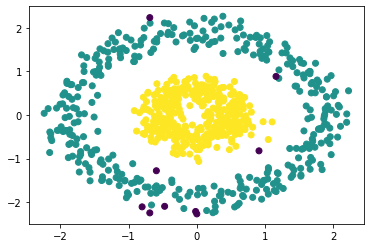

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
